In [1]:
# Import the necessary libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from random import shuffle
from h5py import File
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

Using TensorFlow backend.


### Data Fetching & Understand the data

In [2]:
#Read the data 
SVHNDataset = File("SVHN_single_grey1.h5")

In [3]:
#Columns in the dataset
list(SVHNDataset)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [4]:
#Shape of the 'Train', 'Test' and 'Val' in SVHNDataset
print(SVHNDataset['X_train'].shape)
print(SVHNDataset['X_val'].shape)
print(SVHNDataset['X_test'].shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)


In [5]:
#Segregating the dataset
X_test=np.array(SVHNDataset['X_test'])
X_train=np.array(SVHNDataset['X_train'])
X_val=np.array(SVHNDataset['X_val'])
y_test = np.array(SVHNDataset['y_test'])
y_train = np.array(SVHNDataset['y_train'])
y_val = np.array(SVHNDataset['y_val'])

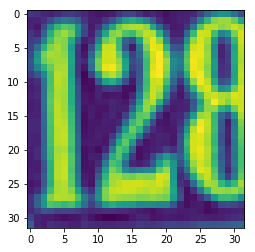

Label:  2


In [6]:
# show first number in the dataset
plt.imshow(X_train[0])    
plt.show()
print('Label: ', y_train[0])

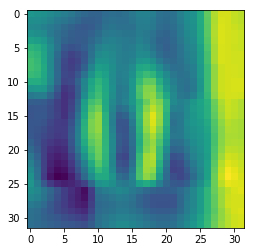

Label:  0


In [7]:
plt.imshow(X_train[100])    
plt.show()
print('Label: ', y_train[100])

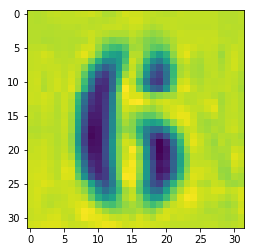

Label:  6


In [8]:
plt.imshow(X_train[1000])    
plt.show()
print('Label: ', y_train[1000])

### Data Preprocessing

In [9]:
#Transforming the image from 32 x 32 ==> 1024
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(60000, 1024)
print(X_val.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)


In [10]:
##Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)
(42000,)
(18000,)
(60000,)


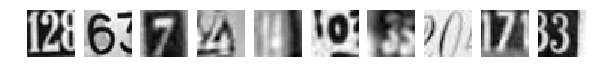

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### Apply K-Nearest Neighor classifier & Print Confusion Matrix

In [11]:
#Applying KNN
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(model_score)
#Confusion matrix
print(metrics.confusion_matrix(y_test, predicted_labels))

0.48405555555555557
[[ 994   44   45   61   71   59  167   41  146  186]
 [  56 1115   99  106  101   60   66  111   60   54]
 [  58  149  904  122   77   66   60  159   80  128]
 [  75  170  127  647   86  206   80   76  139  113]
 [  83  183   43   65 1087   54  103   36   93   65]
 [  91  105   71  217   53  631  191   44  202  163]
 [ 238   78   45   77  108  144  734   27  283   98]
 [  68  173  120   95   30   38   39 1118   47   80]
 [ 165   64   55  124   83  135  262   39  707  178]
 [ 238   92   84  104   61   96  112   64  177  776]]


## Apply Deep Neural Network

PFB, the following ways in which the deep neural network is developed

1. Deep neural network without Lambda
2. Deep neural network with Lambda
3. Deep neural network with Tensorflow

Deep Neural network consists of feed forward, back propagation, RELU activations, stochastic gradient descent, cross entropy loss and cost functions


### 1. Deep Neural network without Lambda

### Components in Neural Network: Fully Connected Layer

In [12]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

### Components in Neural Network: Rectified Linear Activation layer

In [13]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

### Components in Neural Network: Softmax function

In [14]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

### Components in Neural Network: Cross Entropy Function

In [15]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

#### Here, we define the container NN class that enables the forward prop and backward propagation of the entire network. Note, how this class enables us to add layers of different types and also correctly pass gradients using the chain rule

In [16]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

#### Defining the update function (SGD with momentum)

In [17]:
def update_params(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] - learning_rate * g[i]
            p[i] += v[i]

#### Defining a function which gives us the minibatches (both the datapoint and the corresponding label)

In [18]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

#### The training loop

In [19]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update_params(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = np.array([], dtype="int64")
        y_val_pred = np.array([], dtype="int64")
        y_train1 = []
        y_vall = []
        for i in range(0, m_train, minibatch_size):
            X_tr = X_train[i:i + minibatch_size, : ]
            y_tr = y_train[i:i + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for i in range(0, m_val, minibatch_size):
            X_va = X_val[i:i + minibatch_size, : ]
            y_va = y_val[i:i + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)

        mean_train_loss = sum(loss_batch) / float(len(loss_batch))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3}".format(mean_train_loss, train_acc, mean_val_loss, val_acc))
    return net

#### Checking the accuracy of the model

In [20]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

#### Training Neural net without Lambda

In [21]:
## input size
input_dim = X_train.shape[1]

## hyperparameters
iterations = 10
learning_rate = 1e4
hidden_nodes = 32
output_nodes = 10

## define neural net
nn = NN()
nn.add_layer(Linear(input_dim, hidden_nodes))
nn.add_layer(ReLU())
nn.add_layer(Linear(hidden_nodes, output_nodes))

nn = train(nn, X_train , y_train, minibatch_size=200, epoch=10, \
           learning_rate=learning_rate, X_val=X_test, y_val=y_test)

Loss = 33.033237352736684 | Training Accuracy = 0.09933333333333333 | Val Loss = 33.52563895399329 | Val Accuracy = 0.10155555555555555
Loss = 33.16319822883938 | Training Accuracy = 0.09923809523809524 | Val Loss = 32.788811724235195 | Val Accuracy = 0.10177777777777777
Loss = 33.176509677406216 | Training Accuracy = 0.09992857142857142 | Val Loss = 33.34143214655384 | Val Accuracy = 0.10016666666666667
Loss = 33.13518318217828 | Training Accuracy = 0.09923809523809524 | Val Loss = 32.788811724235195 | Val Accuracy = 0.10177777777777777
Loss = 33.20252209483774 | Training Accuracy = 0.09966666666666667 | Val Loss = 33.34143214655384 | Val Accuracy = 0.10077777777777777
Loss = 33.1066746903582 | Training Accuracy = 0.0998095238095238 | Val Loss = 32.788811724235195 | Val Accuracy = 0.10044444444444445
Loss = 33.19406670060217 | Training Accuracy = 0.0999047619047619 | Val Loss = 31.683570879598065 | Val Accuracy = 0.10022222222222223
Loss = 33.136489384966545 | Training Accuracy = 0.09

### Check the predicted output against the true value for a sample data

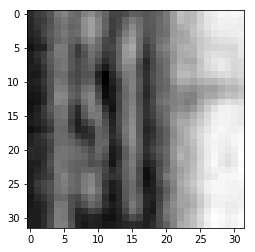

In [22]:
plt.imshow(X_test[0].reshape(32,32), cmap='gray')

In [23]:
# Predict Scores for each class
prediction = nn.predict_scores(X_test[0])[0]

In [24]:
print("Scores")
print(prediction)

Scores
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
np.argmax(prediction)

1

In [27]:
# Original class
y_test[0]

1

### 2. Deep Neural Network with Lambda 

In [28]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

In [29]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0, verb=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

In [30]:
from random import shuffle


## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=1000, epoch=iterations, learning_rate=learning_rate,\
                      X_val=X_test, y_val=y_test, Lambda=Lambda, verb=verb)
    return val_acc

### Train the Deep Neural Network with various learning rate and Lambda values

In [32]:
lr = 1e4
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 32.40328677929184 | Training Accuracy = 0.09971428571428571
Epoch 50/500: Loss = 32.78584338623492 | Training Accuracy = 0.13280952380952382
Epoch 100/500: Loss = 32.70109381635626 | Training Accuracy = 0.10242857142857142
Epoch 150/500: Loss = 32.27938971168494 | Training Accuracy = 0.11483333333333333
Epoch 200/500: Loss = 32.64495497937761 | Training Accuracy = 0.11961904761904762
Epoch 250/500: Loss = 32.51250149692209 | Training Accuracy = 0.12392857142857143
Epoch 300/500: Loss = 32.5353080701875 | Training Accuracy = 0.10526190476190476
Epoch 350/500: Loss = 32.64056910301008 | Training Accuracy = 0.1045
Epoch 400/500: Loss = 32.548465699290304 | Training Accuracy = 0.10445238095238095
Epoch 450/500: Loss = 32.67741046449797 | Training Accuracy = 0.10057142857142858


0.10655555555555556

In [33]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3050226829071607 | Training Accuracy = 0.11466666666666667
Epoch 50/500: Loss = 2.3048750826372713 | Training Accuracy = 0.1148095238095238
Epoch 100/500: Loss = 2.304737489106413 | Training Accuracy = 0.11535714285714285
Epoch 150/500: Loss = 2.3046092190440044 | Training Accuracy = 0.11511904761904762
Epoch 200/500: Loss = 2.304489635053088 | Training Accuracy = 0.11538095238095238
Epoch 250/500: Loss = 2.3043781425892185 | Training Accuracy = 0.11554761904761905
Epoch 300/500: Loss = 2.304274187134987 | Training Accuracy = 0.11569047619047619
Epoch 350/500: Loss = 2.3041772515575087 | Training Accuracy = 0.11585714285714285
Epoch 400/500: Loss = 2.3040868536370227 | Training Accuracy = 0.11626190476190476
Epoch 450/500: Loss = 2.304002543755616 | Training Accuracy = 0.11628571428571428


0.117

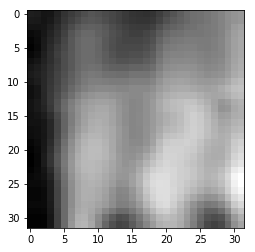

In [34]:
plt.imshow(X_test[100].reshape(32,32), cmap='gray')

In [35]:
# Predict Scores for each class
prediction = nn.predict_scores(X_test[100])[0]

In [36]:
print("Scores")
print(prediction)

Scores
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
np.argmax(prediction)

1

In [38]:
# Original class
y_test[100]

2

In [39]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 32.504650662473736 | Training Accuracy = 0.10026190476190476
Epoch 50/500: Loss = 32.5844298855047 | Training Accuracy = 0.10904761904761905
Epoch 100/500: Loss = 32.75723341438844 | Training Accuracy = 0.11338095238095239
Epoch 150/500: Loss = 32.665130010668676 | Training Accuracy = 0.12980952380952382
Epoch 200/500: Loss = 32.581798359684136 | Training Accuracy = 0.12557142857142858
Epoch 250/500: Loss = 32.66776153648924 | Training Accuracy = 0.10266666666666667
Epoch 300/500: Loss = 32.66249848522069 | Training Accuracy = 0.12333333333333334
Epoch 350/500: Loss = 32.5274134929749 | Training Accuracy = 0.10207142857142858
Epoch 400/500: Loss = 32.57390378222243 | Training Accuracy = 0.12364285714285714
Epoch 450/500: Loss = 32.44283880882801 | Training Accuracy = 0.11295238095238096


0.11566666666666667

### Arrive at the optimal Learning rate and Lambda values

In [40]:
import math
for k in range(1,20):
    lr = math.pow(10, np.random.uniform(-7.0, 4.0))
    Lambda = math.pow(10, np.random.uniform(-5,5))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Try 1/100: Best_val_acc: 0.12277777777777778, lr: 0.9150703025132784, Lambda: 0.01570855432115486

Try 2/100: Best_val_acc: 0.12033333333333333, lr: 1.8295362454582713, Lambda: 0.002275926392303704

Try 3/100: Best_val_acc: 0.10244444444444445, lr: 2078.7873980422864, Lambda: 0.006305575150220664

Try 4/100: Best_val_acc: 0.10827777777777778, lr: 5.807387592277431e-06, Lambda: 0.004497535951377041

Try 5/100: Best_val_acc: 0.10644444444444444, lr: 2115.7476005811413, Lambda: 0.05124408960042568

Try 6/100: Best_val_acc: 0.10316666666666667, lr: 149.0483870850796, Lambda: 0.0055088881316504796

Try 7/100: Best_val_acc: 0.09983333333333333, lr: 1.700550464827178, Lambda: 242.83555162897719

Try 8/100: Best_val_acc: 0.10433333333333333, lr: 6.036847276484536e-06, Lambda: 4.177529282473531

Try 9/100: Best_val_acc: 0.12533333333333332, lr: 8.27828606843647e-05, Lambda: 0.006735771394220426

Try 10/100: Best_val_acc: 0.1282222222222222, lr: 6.700994527961305, Lambda: 0.011743761208737333

T

### Training the neural network with the arrived optimal learning rate and Lambda value

In [41]:
lr = 0.014903663453882087
Lambda = 0.00012387930450230984
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.308681858153596 | Training Accuracy = 0.10623809523809524
Epoch 50/500: Loss = 2.2552167292694416 | Training Accuracy = 0.1960952380952381
Epoch 100/500: Loss = 2.248517058970041 | Training Accuracy = 0.20735714285714285
Epoch 150/500: Loss = 2.2448073539317206 | Training Accuracy = 0.21114285714285713
Epoch 200/500: Loss = 2.2422181594896653 | Training Accuracy = 0.21435714285714286
Epoch 250/500: Loss = 2.240215098094683 | Training Accuracy = 0.2159047619047619
Epoch 300/500: Loss = 2.2385715790034566 | Training Accuracy = 0.21802380952380954
Epoch 350/500: Loss = 2.2371711888429906 | Training Accuracy = 0.21804761904761905
Epoch 400/500: Loss = 2.235946383627491 | Training Accuracy = 0.21819047619047618
Epoch 450/500: Loss = 2.2348545214988995 | Training Accuracy = 0.2190952380952381


0.2006111111111111

In [42]:
# Predict Scores for each class
prediction = nn.predict_scores(X_test[1000])[0]
print("Scores")
print(prediction)

Scores
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
np.argmax(prediction)

1

In [45]:
# Original class
y_test[1000]

1

## 3. Deep Neural Network with Tensorflow

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [47]:
model = Sequential()

In [48]:
  model.add(Dense(50, input_shape = (1024, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [49]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 29us/sample - loss: 2.3770 - accuracy: 0.0979
Epoch 2/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3030 - accuracy: 0.1002
Epoch 3/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.1009
Epoch 4/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.1011
Epoch 5/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.1006
Epoch 6/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.0977
Epoch 7/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.1000
Epoch 8/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.0975
Epoch 9/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3028 - accuracy: 0.0997
Epoch

Epoch 76/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3028 - accuracy: 0.0986
Epoch 77/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.3028 - accuracy: 0.1009
Epoch 78/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3028 - accuracy: 0.0996
Epoch 79/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.3028 - accuracy: 0.0987
Epoch 80/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.3028 - accuracy: 0.0996
Epoch 81/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3027 - accuracy: 0.1005
Epoch 82/100
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3028 - accuracy: 0.1000
Epoch 83/100
42000/42000 [==============================] - 1s 21us/sample - loss: 2.3028 - accuracy: 0.1003
Epoch 84/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3028 - accuracy: 0.1000
Epoch 85/100
42000/

In [53]:
results = model.evaluate(X_test, y_test)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [54]:
print('Test accuracy: ', results[1])

Test accuracy:  0.100777775


### Weigh Initialization in Tensorflow

In [55]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [56]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 23us/sample - loss: 2.4426 - accuracy: 0.0997
Epoch 2/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3785 - accuracy: 0.0997
Epoch 3/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3454 - accuracy: 0.0997
Epoch 4/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3268 - accuracy: 0.0997
Epoch 5/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3162 - accuracy: 0.0997
Epoch 6/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3101 - accuracy: 0.0997
Epoch 7/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3066 - accuracy: 0.0990
Epoch 8/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3047 - accuracy: 0.1003
Epoch 9/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3037 - accuracy: 0.1022
Epoch

42000/42000 [==============================] - 1s 18us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 77/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 78/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 79/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 80/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 81/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3026 - accuracy: 0.1019s - loss: 2.3
Epoch 82/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 83/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3026 - accuracy: 0.1020
Epoch 84/100
42000/42000 [==============================] - 1s 16us/sample - loss: 2.3026 - accuracy: 0.1019
Epoch 85/100
42000/

In [57]:
results = model.evaluate(X_test, y_test)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [58]:
print('Test accuracy: ', results[1])

Test accuracy:  0.0955


### Non linearity in Tensorflow

In [59]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [60]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 52us/sample - loss: 2.3043 - accuracy: 0.1029
Epoch 2/10
42000/42000 [==============================] - 2s 55us/sample - loss: 2.3003 - accuracy: 0.1098
Epoch 3/10
42000/42000 [==============================] - 2s 47us/sample - loss: 2.2984 - accuracy: 0.1221
Epoch 4/10
42000/42000 [==============================] - 2s 44us/sample - loss: 2.2961 - accuracy: 0.1305
Epoch 5/10
42000/42000 [==============================] - 2s 47us/sample - loss: 2.2929 - accuracy: 0.1378
Epoch 6/10
42000/42000 [==============================] - 2s 50us/sample - loss: 2.2900 - accuracy: 0.1486s - loss: 2.2905 - accuracy: 0.14 - ETA: 0s - loss: 2.2905 - accuracy: 0.14 - ETA: 0s -
Epoch 7/10
42000/42000 [==============================] - 2s 52us/sample - loss: 2.2868 - accuracy: 0.1575
Epoch 8/10
42000/42000 [==============================] - 2s 46us/sample - loss: 2.2830 - accuracy: 0.1668
Epoch 9/10
42000/42000 [==========

In [61]:
results = model.evaluate(X_test, y_test)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [62]:
print('Test accuracy: ', results[1])

Test accuracy:  0.18944444


### Batch Normalization in Tensorflow

In [63]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [64]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(75, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(75))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(75))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(75))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 40, verbose = 1)

Train on 42000 samples
Epoch 1/40
42000/42000 [==============================] - 4s 91us/sample - loss: 2.3856 - accuracy: 0.1360
Epoch 2/40
42000/42000 [==============================] - 4s 88us/sample - loss: 2.1292 - accuracy: 0.2355
Epoch 3/40
42000/42000 [==============================] - 3s 82us/sample - loss: 1.9258 - accuracy: 0.3376
Epoch 4/40
42000/42000 [==============================] - 4s 84us/sample - loss: 1.7543 - accuracy: 0.4182
Epoch 5/40
42000/42000 [==============================] - 3s 80us/sample - loss: 1.6148 - accuracy: 0.4759
Epoch 6/40
42000/42000 [==============================] - 3s 70us/sample - loss: 1.4987 - accuracy: 0.5166
Epoch 7/40
42000/42000 [==============================] - 3s 74us/sample - loss: 1.4087 - accuracy: 0.5501
Epoch 8/40
42000/42000 [==============================] - 3s 77us/sample - loss: 1.3426 - accuracy: 0.5731
Epoch 9/40
42000/42000 [==============================] - 3s 69us/sample - loss: 1.2763 - accuracy: 0.5944
Epoch 10/40
42

In [66]:
results = model.evaluate(X_test, y_test)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [67]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7308889


### Weight initialization, Back normalization and Dropout in Tensorflow

In [68]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(100, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [69]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 40, verbose = 1)

Train on 42000 samples
Epoch 1/40
42000/42000 [==============================] - 5s 128us/sample - loss: 2.0312 - accuracy: 0.2715
Epoch 2/40
42000/42000 [==============================] - 4s 105us/sample - loss: 1.5018 - accuracy: 0.4957
Epoch 3/40
42000/42000 [==============================] - 5s 111us/sample - loss: 1.3301 - accuracy: 0.5698
Epoch 4/40
42000/42000 [==============================] - 5s 107us/sample - loss: 1.2389 - accuracy: 0.6035
Epoch 5/40
42000/42000 [==============================] - 5s 109us/sample - loss: 1.1732 - accuracy: 0.6299
Epoch 6/40
42000/42000 [==============================] - 5s 112us/sample - loss: 1.1288 - accuracy: 0.6441
Epoch 7/40
42000/42000 [==============================] - 4s 100us/sample - loss: 1.0859 - accuracy: 0.6575
Epoch 8/40
42000/42000 [==============================] - 4s 107us/sample - loss: 1.0530 - accuracy: 0.6690
Epoch 9/40
42000/42000 [==============================] - 4s 93us/sample - loss: 1.0408 - accuracy: 0.6720
Epoch 

In [70]:
results = model.evaluate(X_test, y_test)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [71]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8092222


### Random check of the predicted values Vs True values in the data set 

#### First Random Sample in the data set

In [72]:
predictions = model.predict(X_test)
predictions[0]

array([0.18649541, 0.24998134, 0.07812121, 0.03764784, 0.07700006,
       0.02886436, 0.08423077, 0.03056289, 0.1634642 , 0.06363186],
      dtype=float32)

In [73]:
np.argmax(predictions[1000])

1

In [74]:
y_test[1000]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [75]:
y_test = np.array(SVHNDataset['y_test'])

In [77]:
y_test[1000]

1

#### Second Random Sample in the data set

In [78]:
np.argmax(predictions[1645])

9

In [79]:
y_test[1645]

2

#### Third Random Sample in the data set 

In [80]:
np.argmax(predictions[2000])

5

In [81]:
y_test[2000]

5

### Print confusion matrix 

In [83]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
confusion_matrix(y_test, Y_pred_cls)

array([[1575,   34,   15,   26,   25,    3,   41,   12,   32,   51],
       [  42, 1584,   15,   45,   36,   11,   19,   33,   25,   18],
       [  43,   48, 1408,  105,   34,   21,    7,   50,   40,   47],
       [  20,   53,   33, 1350,   21,  110,   26,   25,   55,   26],
       [  38,   77,   31,   14, 1530,   18,   46,   10,   18,   30],
       [  21,   27,   13,  129,   15, 1410,   69,    6,   43,   35],
       [  59,   36,    9,   36,   38,   74, 1464,    6,   95,   15],
       [  34,   90,   44,  103,   17,   14,    8, 1464,   14,   20],
       [  39,   49,   15,   68,   34,   48,  105,    6, 1381,   67],
       [  93,   53,   23,   67,   28,   37,   25,   16,   62, 1400]])

### Inferences from training the model with KNN Vs Deep Neural Network

1. Accuracy of the model in KNN is 48.41% whereas the accuracy of the model in Neural networks through Tensor flow is 80.92%
2. Confusion matrix in predicting the output is better in Deep Neural Networks when compared to the KNN model
3. Training time in Deep Neural network is lower than the training time in KNN based model